# Search: Solving a Maze Using a Goal-based Agent

Kirk Watson - 47876885

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [1]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [2]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

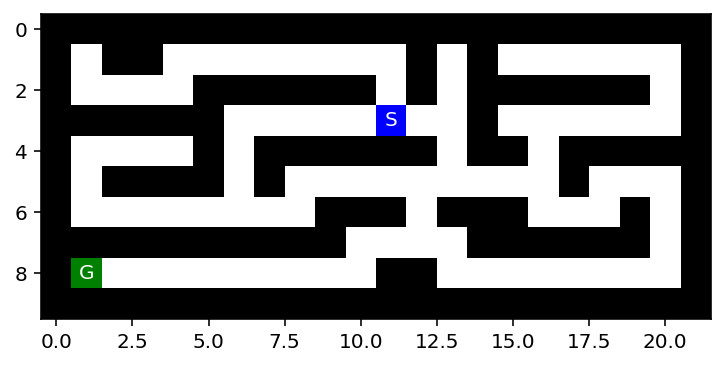

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    c:\users\kirk\documents\visual studio code\github\5320-ai\assignment_3\maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [6]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

* **Initial state:** Position marked S.
* **Actions:** Move from one position to another (North, South, East, West).
* **Transition model:** If you go from position A to position B, you end up in position B.
* **Goal state:** Position marked G.
* **Path cost:** Length of path (Sum of tiles in path).

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determine these values for a given maze.

* $n$: Counting number of white or blank tiles
* $d$: Counting number of actions or nodes used in goal path
* $m$: Counting number of actions in longest path
* $b$: Counting number of successor nodes for a parent

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [7]:
import copy

def breadth_first_search(maze, vis=False):
    expanded_counter=0
    max_depth=0
    max_frontier_size=0
    max_branching_factor=0
    node_memory=0
    
    root=Node(pos=mh.find_pos(maze, what = "S"),parent=None,action=None,cost=0)
    
    frontier = [root]       
    reached = {root.pos}
    #loop until queue is empty
    while frontier:
        max_frontier_size=max(max_frontier_size,len(frontier))
        current = frontier.pop(0)
        max_depth=max(max_depth, current.cost)
        if vis and maze[current.pos[0]][current.pos[1]]!='G' and maze[current.pos[0]][current.pos[1]]!='S': maze[current.pos[0]][current.pos[1]]='.'
        #expand to next level
        branching_factor=0
        for child in expand(maze,current):
            branching_factor+=1
            max_branching_factor=max(max_branching_factor,branching_factor)
            #check if child is goal
            if maze[child.pos[0]][child.pos[1]]=='G':
                if vis:
                    for path in child.get_path_from_root():
                        if maze[path.pos[0]][path.pos[1]]!='G' and maze[path.pos[0]][path.pos[1]]!='S':
                            maze[path.pos[0]][path.pos[1]]='P'
                return child.cost, expanded_counter, max_depth, node_memory, max_frontier_size
            #if child hasn't been reached, add to frontier
            if child.pos not in reached:
                node_memory+=1
                expanded_counter+=1
                reached.add(child.pos)
                frontier.append(child)
                if vis and maze[child.pos[0]][child.pos[1]]!='G' and maze[child.pos[0]][child.pos[1]]!='S': maze[child.pos[0]][child.pos[1]]='F'
    #no path was found
    return "N/A", expanded_counter, max_depth, node_memory, max_frontier_size

#BFS + DFS - add next level below node to search tree
def expand(maze, root):
    #get position and all directions
    row, col=root.pos
    directions = [
        ("north", (row - 1, col)),
        ("south", (row + 1, col)),
        ("west", (row, col - 1)),
        ("east", (row, col + 1))
    ]
    #get possible actions and create child nodes
    child_actions=[]
    for action, (row, col) in directions:
        #create node if action is possible
        if maze[row][col]!='X':
            child_cost=root.cost+1
            child=Node(pos=(row,col),parent=root,action=action,cost=child_cost)
            child_actions.append(child)
    
    return child_actions

In [8]:
def iterative_deepening_search(maze, limit, vis=False):
    #run depth first search with increasing depth limit until solution is found
    for depth in range(limit):
        ids_maze=copy.deepcopy(maze) 
        result, expanded_counter, max_depth, max_nodes, max_frontier_size=depth_first_search(maze=ids_maze, limit=depth, vis=vis)
        if result != "cutoff":
            if vis: mh.show_maze(ids_maze)
            return result, expanded_counter, max_depth, max_nodes, max_frontier_size        

def depth_first_search(maze, limit, vis=False):
    expanded_counter=0
    max_depth=0
    max_frontier_size=0
    max_branching_factor=0

    root=Node(pos=mh.find_pos(maze, what = "S"),parent=None,action=None,cost=0)
    
    #set result
    result = "N/A"
    frontier = [root]
    #loop until queue is empty
    while frontier:
        max_frontier_size=max(max_frontier_size,len(frontier))
        current = frontier.pop()
        max_depth=max(max_depth, current.cost)
        if vis and maze[current.pos[0]][current.pos[1]]!='G' and maze[current.pos[0]][current.pos[1]]!='S': maze[current.pos[0]][current.pos[1]]='.'
        #check if child is goal
        if maze[current.pos[0]][current.pos[1]]=='G':
            if vis:
                for path in child.get_path_from_root():
                    if maze[path.pos[0]][path.pos[1]]!='G' and maze[path.pos[0]][path.pos[1]]!='S':
                        maze[path.pos[0]][path.pos[1]]='P'
            return current.cost, expanded_counter, max_depth, max_branching_factor*current.cost, max_frontier_size
        #check if depth is greater than limit
        if get_depth(current) > limit: result="cutoff"
        #if current node is not a cycle
        elif not is_cycle(current):
            #expand to next level
            branching_factor=0
            for child in expand(maze,current):
                branching_factor+=1
                max_branching_factor=max(max_branching_factor,branching_factor)
                expanded_counter+=1
                frontier.append(child)
                if vis and maze[child.pos[0]][child.pos[1]]!='G' and maze[child.pos[0]][child.pos[1]]!='S': maze[child.pos[0]][child.pos[1]]='F'
    
    return result, expanded_counter, max_depth, max_branching_factor*current.cost, max_frontier_size

#DFS - get depth of node
def get_depth(node):
    depth = -1
    for path in node.get_path_from_root():
        depth+=1
    return depth

#DFS - check for cycles in path
def is_cycle(node):
    path = set()
    #loop through path
    for current in node.get_path_from_root():
        #add node to path if not cycle
        if current.pos not in path:
            path.add(current.pos)
        #return true if cycle
        else:
            return True
    #return false if not cycle
    return False

How does BFS and DFS deal with loops (cycles)?

BFS deals with loops by saving the states/positions that has been already been accessed. When expanding to a new position, the search will not continue to positions that have been already accessed by checking the saved positions.

Limited DFS deals with loops by checking if the current node's position matches the position of another node on the current path.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

The BFS implementation is complete and optimal. BFS is optimal because the cost is the same per action. The time and space complexity of BFS is $O(b^d)$.

The DFS implementation is complete only in finite spaces. It is not optimal as it returns the first solution it finds. The time complexity of DFS is $O(b^m)$. The space complexity is $O(bm)$. With IDS, BFS is complete and optimal (with action cost of 1), time complexity is $O(b^d)$, and space complexity is $O(bd)$.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [9]:
def best_first_search(maze, strategy, vis=False):
    expanded_counter=0
    max_depth=0
    max_frontier_size=0
    max_branching_factor=0
    
    root=Node(pos=mh.find_pos(maze, what = "S"),parent=None,action=None,cost=0)
    
    frontier = PriorityQueue(maze, strategy)
    frontier.insert(root)
    reached = {root.pos:root}
    #loop until frontier is empty
    while not frontier.isEmpty():
        max_frontier_size=max(max_frontier_size,len(frontier.queue))
        current = frontier.pop()
        max_depth=max(max_depth, current.cost)
        if vis and maze[current.pos[0]][current.pos[1]]!='G' and maze[current.pos[0]][current.pos[1]]!='S': maze[current.pos[0]][current.pos[1]]='.'
        #check if current is goal
        if maze[current.pos[0]][current.pos[1]]=='G':
            if vis:
                for path in current.get_path_from_root():
                    if maze[path.pos[0]][path.pos[1]]!='G' and maze[path.pos[0]][path.pos[1]]!='S':
                        maze[path.pos[0]][path.pos[1]]='P'
            return current.cost, expanded_counter, max_depth, max_branching_factor*current.cost, max_frontier_size
        #expand to next level
        branching_factor=0
        for child in expand(maze,current):
            branching_factor+=1
            max_branching_factor=max(max_branching_factor,branching_factor)
            #if child hasn't been reached, add to frontier
            if child.pos not in reached or child.cost<reached[child.pos].cost:
                expanded_counter+=1
                reached[child.pos]=child
                frontier.insert(child)
                if vis and maze[child.pos[0]][child.pos[1]]!='G' and maze[child.pos[0]][child.pos[1]]!='S': maze[child.pos[0]][child.pos[1]]='F'
    #no path was found
    return "N/A", expanded_counter, max_depth, max_branching_factor**child.cost, max_frontier_size

#implementation of Priority Queue with inspiration from geeksforgeeks.org
class PriorityQueue(object):
    def __init__(self, maze, func):
        self.queue = []
        self.func = func
        self.maze = maze
 
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
 
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.queue) == 0
 
    # for inserting an element in the queue
    def insert(self, data):
        self.queue.append(data)
 
    # for popping an element based on Priority
    # use h(n) to get priority
    def pop(self):
        return self.func(self.maze, self.queue)
    
#heuristic function used for greedy bfs
def greedy_bfs(maze, queue):
    goal_pos=mh.find_pos(maze, what = "G")
    #find node with smallest value from goal
    min_node = queue[0]
    min_distance = abs(goal_pos[0]-min_node.pos[0])+abs(goal_pos[1]-min_node.pos[1])
    min_index=0
    #check nodes in queue
    index=0
    for node in queue:
        heuristic_val=abs(goal_pos[0]-node.pos[0])+abs(goal_pos[1]-node.pos[1])
        if heuristic_val < min_distance:
            min_node=node
            min_distance=heuristic_val
            min_index=index
        index+=1
    
    del queue[min_index]
    return min_node

#heuristic function used for a* search
def a_star(maze, queue):
    goal_pos=mh.find_pos(maze, what = "G")
    #find node with smallest value from goal
    min_node = queue[0]
    min_distance = min_node.cost+abs(goal_pos[0]-min_node.pos[0])+abs(goal_pos[1]-min_node.pos[1])
    min_index=0
    #check nodes in queue
    index=0
    for node in queue:
        heuristic_val=node.cost+abs(goal_pos[0]-node.pos[0])+abs(goal_pos[1]-node.pos[1])
        if heuristic_val < min_distance:
            min_node=node
            min_distance=heuristic_val
            min_index=index
        index+=1
    
    del queue[min_index]
    return min_node

Are your implementations complete and optimal? What is the time and space complexity?

GBFS is complete if complete in finite spaces, is not optimal, has worst case time and space complexity of $O(b^m)$ and best case $O(bm)$ if $h(n)$ is 100% accurate.

A* search is complete and is optimally efficient. A* search time and space complexity depends on number of nodes for which $f(n)\leq C^*$ (exponential).

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

MAZE: small_maze.txt
BFS:


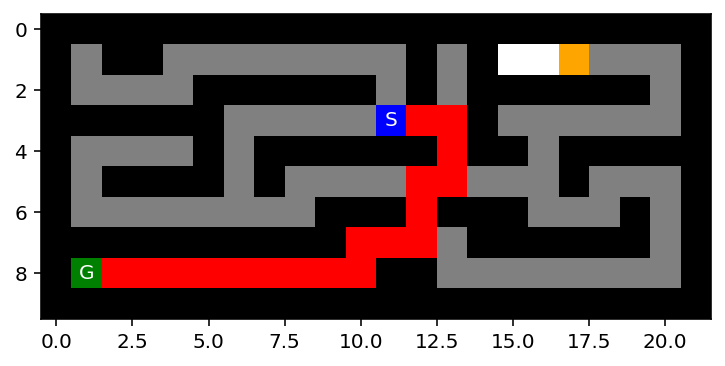

DFS:


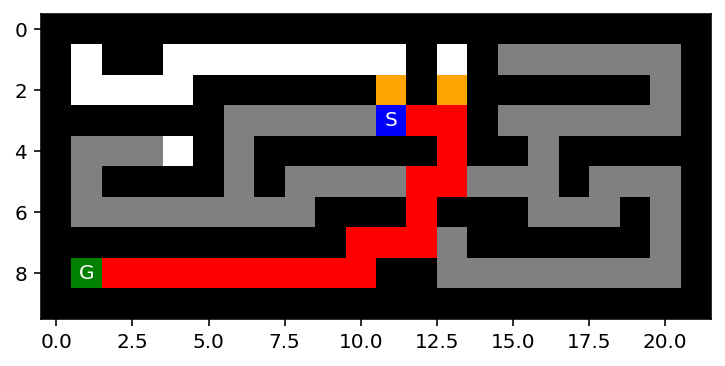

GFS:


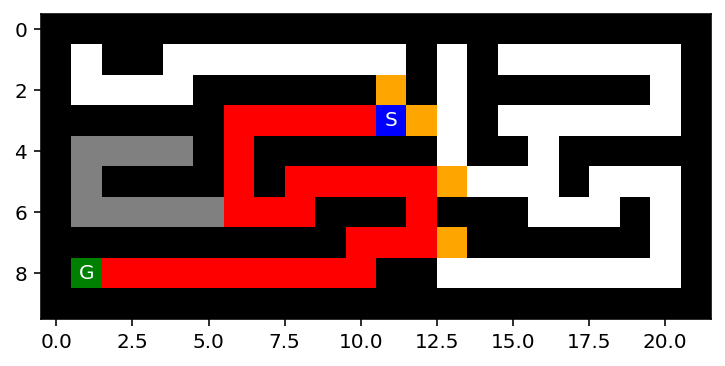

A*:


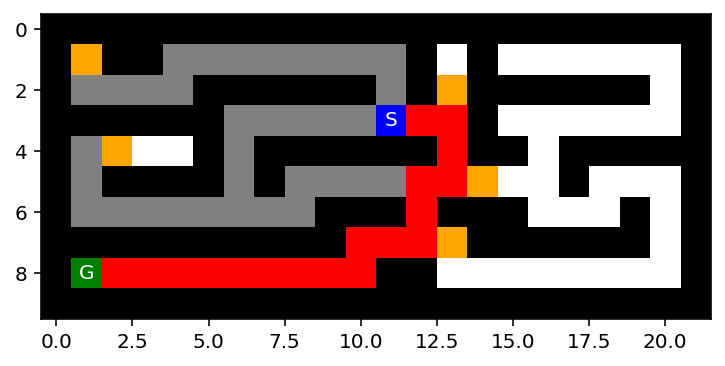

MAZE: medium_maze.txt
BFS:


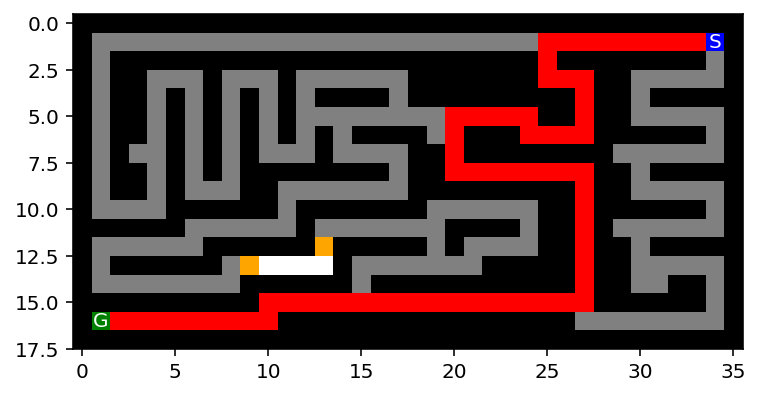

DFS:


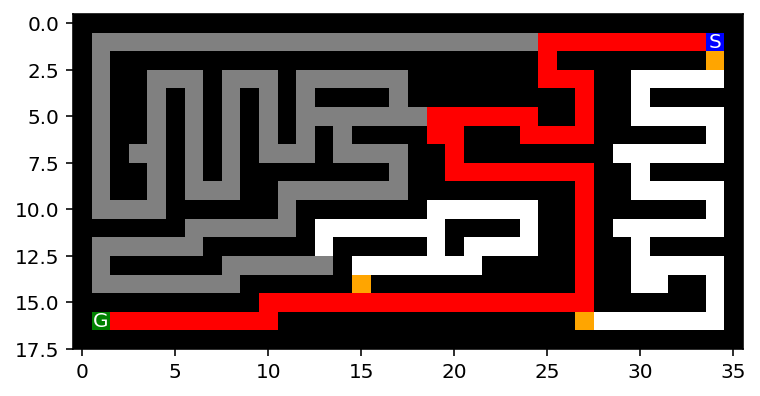

GFS:


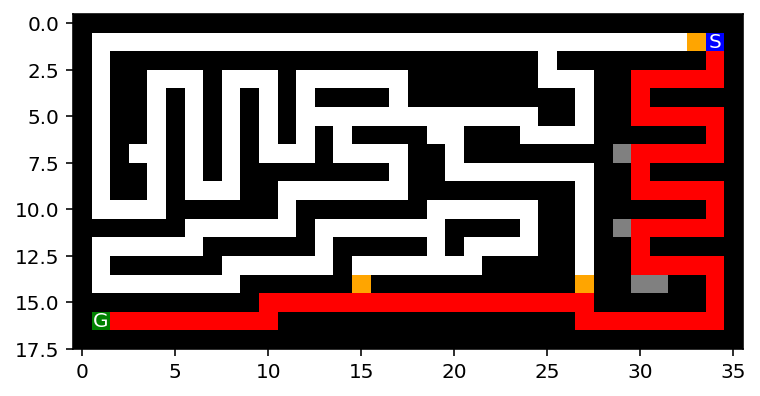

A*:


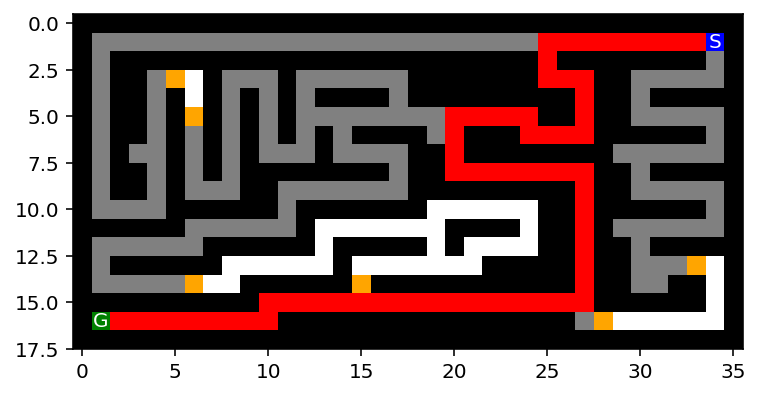

MAZE: large_maze.txt
BFS:


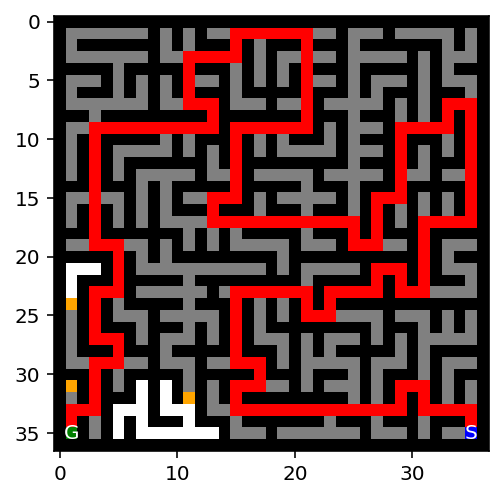

DFS:


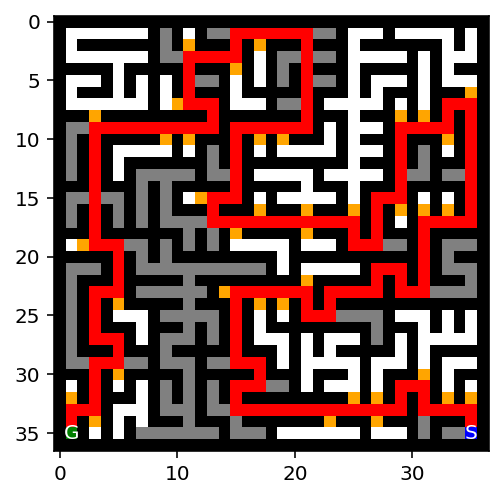

GFS:


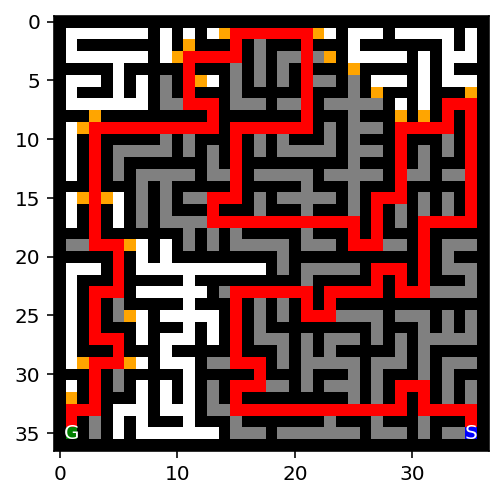

A*:


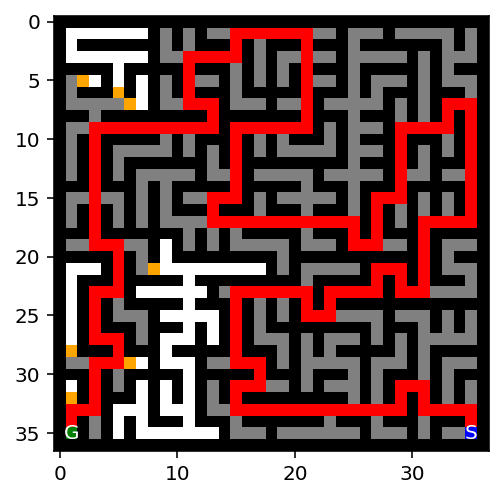

MAZE: wall_maze.txt
BFS:


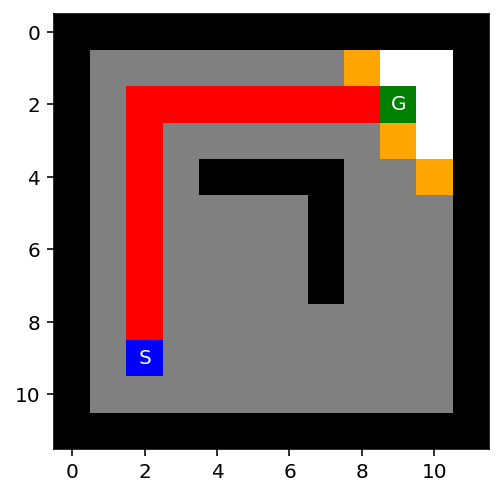

DFS:


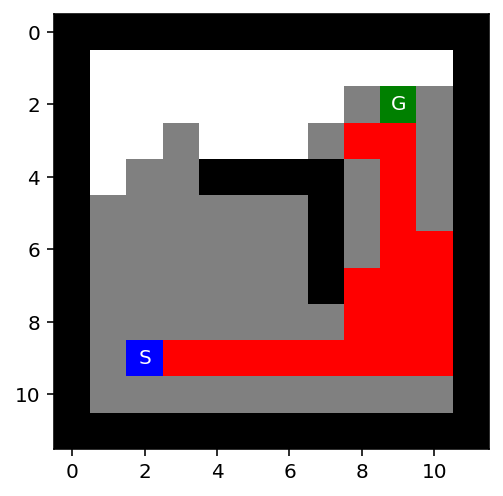

GFS:


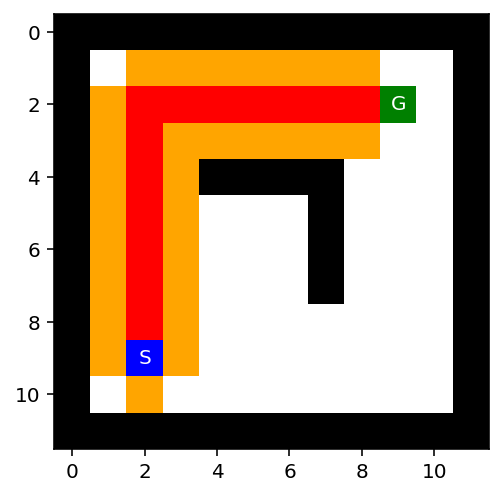

A*:


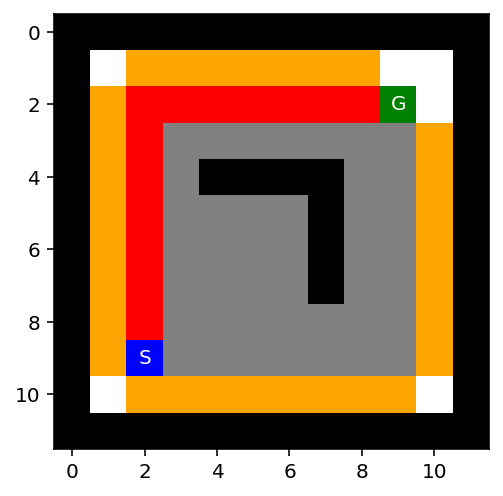

MAZE: open_maze.txt
BFS:


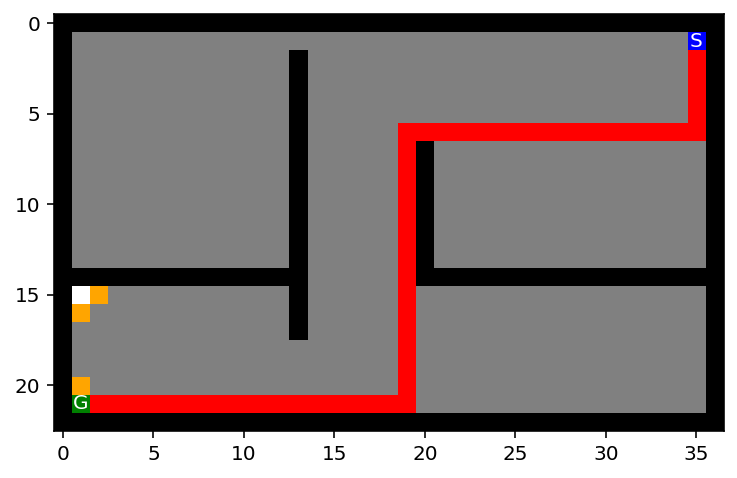

DFS:


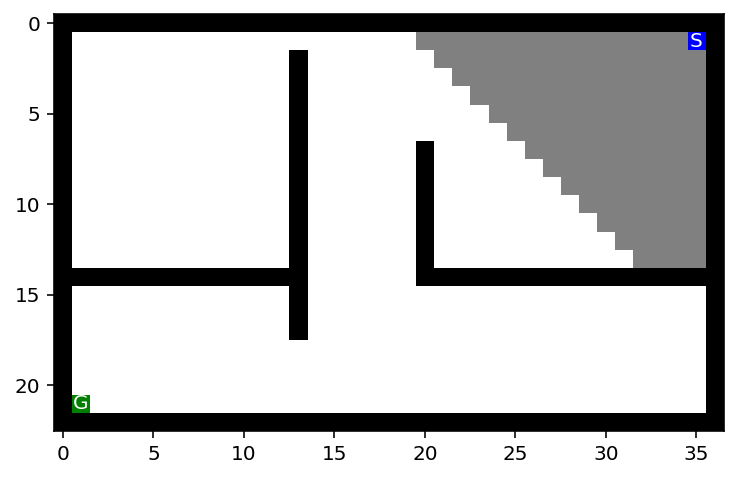

GFS:


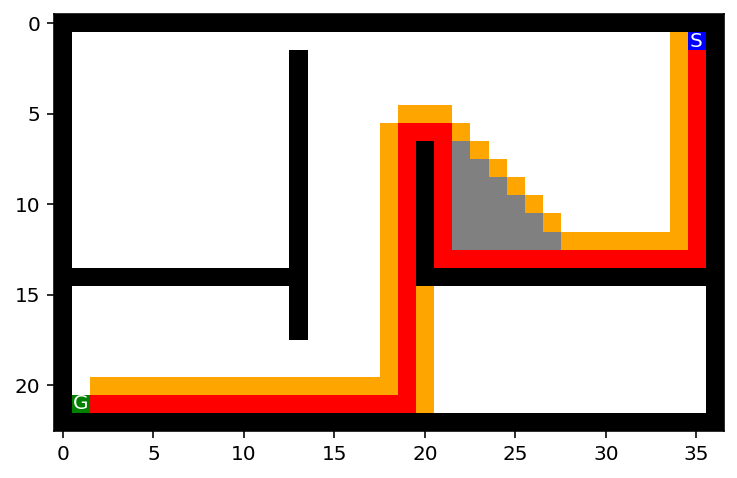

A*:


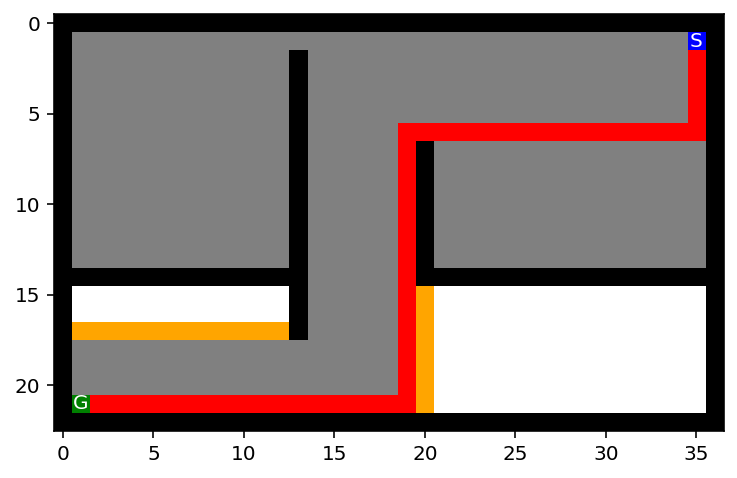

MAZE: loops_maze.txt
BFS:


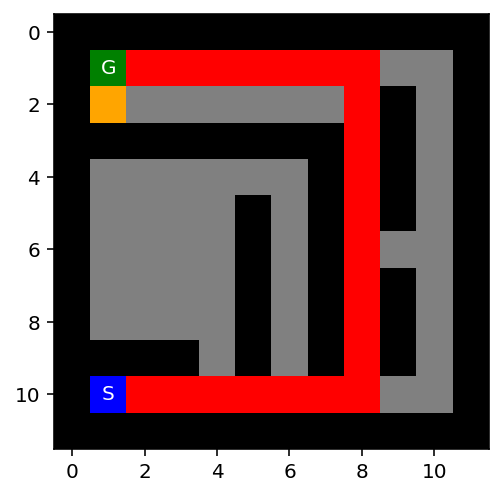

DFS:


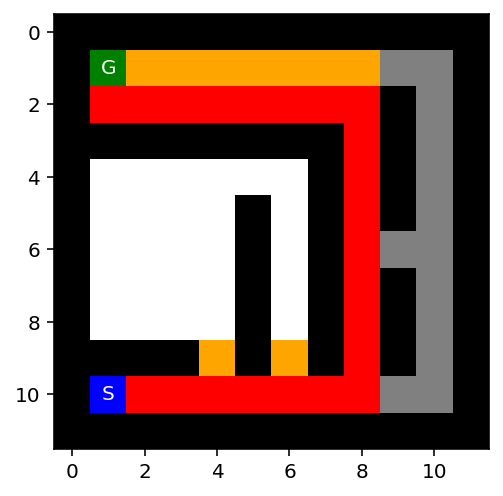

GFS:


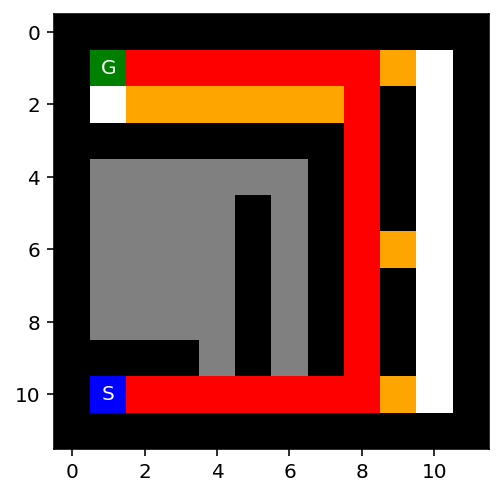

A*:


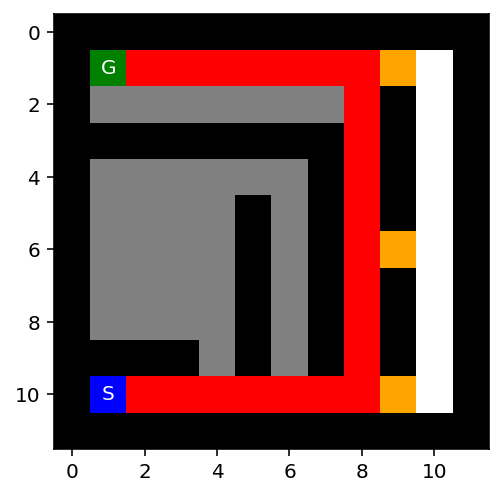

MAZE: L_maze.txt
BFS:


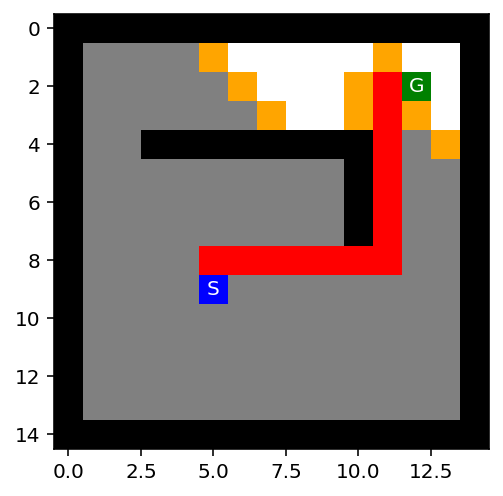

DFS:


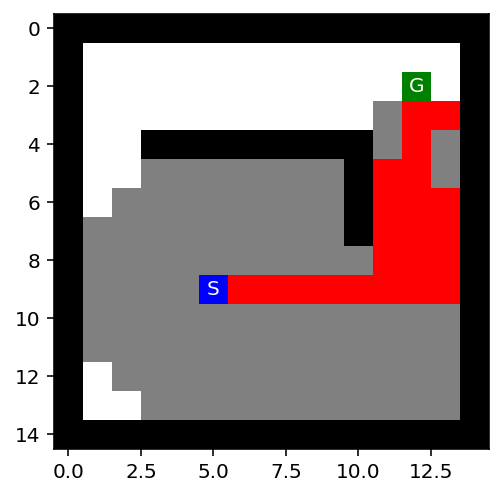

GFS:


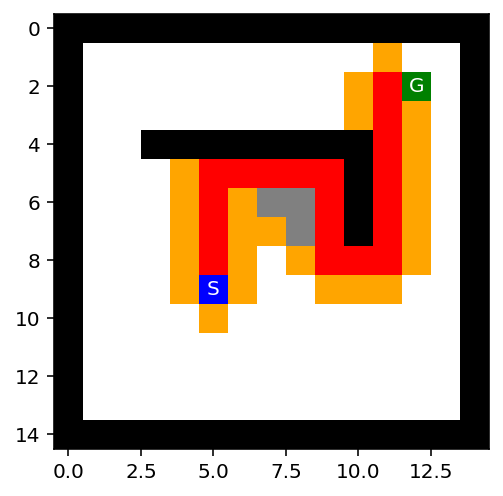

A*:


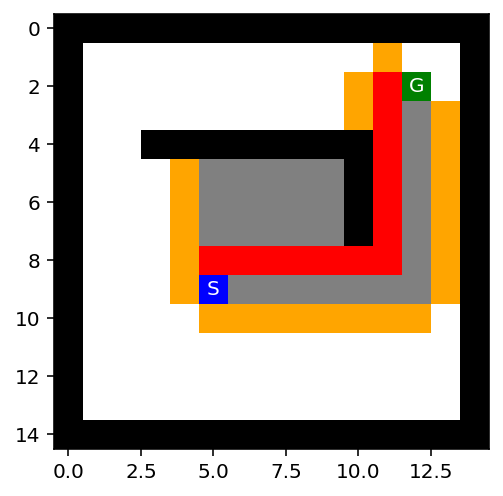

MAZE: empty_maze.txt
BFS:


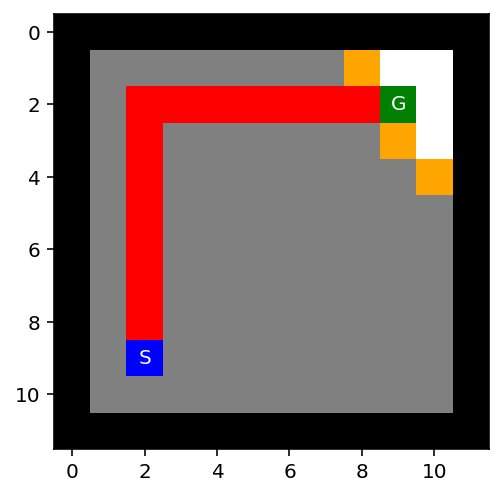

DFS:


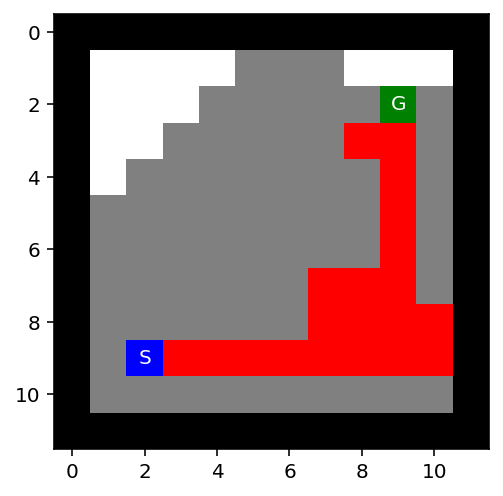

GFS:


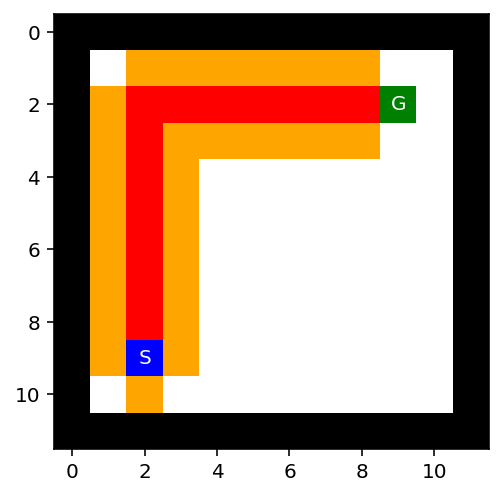

A*:


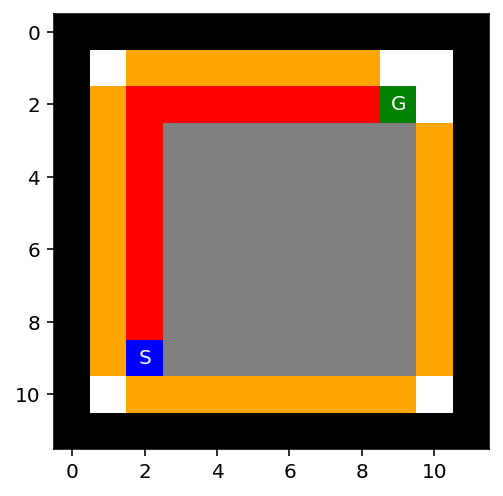

MAZE: empty_2_maze.txt
BFS:


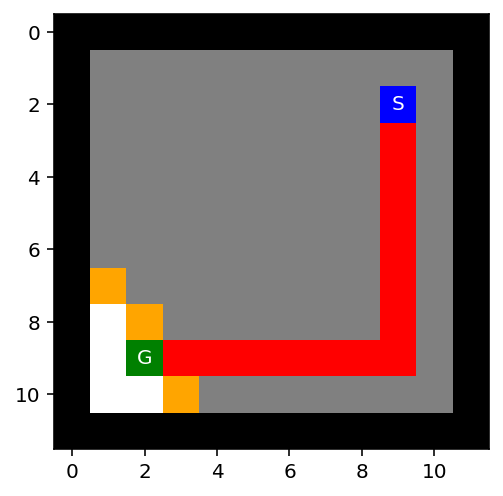

DFS:


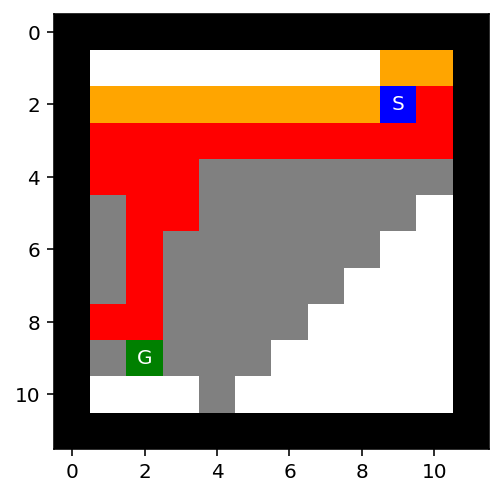

GFS:


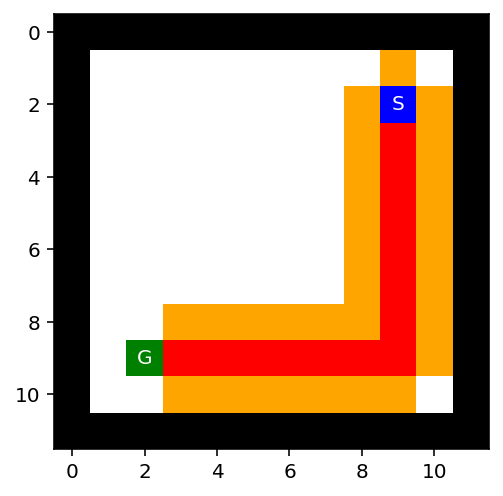

A*:


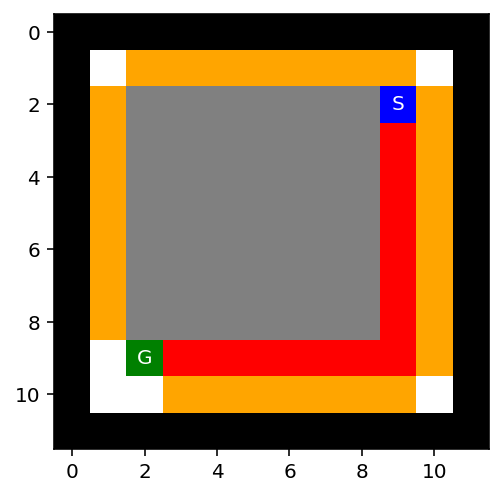

In [10]:
maze_results={}
file_names = ["small_maze.txt","medium_maze.txt","large_maze.txt",
              "wall_maze.txt","open_maze.txt","loops_maze.txt",
              "L_maze.txt","empty_maze.txt","empty_2_maze.txt"]

dfs_limits = [20,70,215,20,14,25,21,20,20]
limit_index=0

for file in file_names:
    with open(file, "r") as f:
        maze_str = f.read()
    maze = mh.parse_maze(maze_str)

    bfs_maze=copy.deepcopy(maze)
    dfs_maze=copy.deepcopy(maze)
    gfs_maze=copy.deepcopy(maze)
    a_star_maze=copy.deepcopy(maze)
    
    print("MAZE:",file)

    maze_results[file] = {
        "BFS" : breadth_first_search(maze=bfs_maze, vis=True),
        "DFS" : depth_first_search(maze=dfs_maze, limit=dfs_limits[limit_index], vis=True),
        "GBS" : best_first_search(maze=gfs_maze,strategy=greedy_bfs, vis=True),
        "A*" : best_first_search(maze=a_star_maze,strategy=a_star, vis=True)
    }
    limit_index+=1

    print("BFS:")
    mh.show_maze(bfs_maze)
    print("DFS:")
    mh.show_maze(dfs_maze)
    print("GFS:")
    mh.show_maze(gfs_maze)
    print("A*:")
    mh.show_maze(a_star_maze)

Complete the following table for each maze.

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|----------------|----------------|---------------|-------------------|
| BFS       |           |                |                |               |                   |
| DFS       |           |                |                |               |                   |
| GBS       |           |                |                |               |                   |
| A*        |           |                |                |               |                   |

__Medium Maze__

...

In [11]:
import numpy as np  
import pandas as pd

for maze in maze_results:
    print("MAZE:",maze)
    df = pd.DataFrame(maze_results[maze], index=["path cost","# of nodes expanded",
                                                 "max tree depth","max # of nodes in memory",
                                                 "max frontier size"])
    display(df.transpose())
    print()
    print()

MAZE: small_maze.txt


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,19,90,18,90,8
DFS,19,174,21,57,19
GBS,29,43,29,87,5
A*,19,59,19,57,8




MAZE: medium_maze.txt


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,68,268,67,268,8
DFS,70,623,71,210,34
GBS,74,81,74,222,4
A*,68,228,68,204,8




MAZE: large_maze.txt


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,210,619,209,619,8
DFS,210,794,216,840,133
GBS,210,486,210,840,21
A*,210,556,210,840,12




MAZE: wall_maze.txt


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,87,13,87,11
DFS,20,1871,21,80,49
GBS,14,42,14,56,29
A*,14,86,14,56,31




MAZE: open_maze.txt


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,54,681,53,681,25
DFS,cutoff,1550587,15,8,34
GBS,68,154,68,272,66
A*,54,554,54,216,25




MAZE: loops_maze.txt


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,23,70,22,70,8
DFS,23,574,26,69,24
GBS,23,85,23,92,10
A*,23,62,23,92,6




MAZE: L_maze.txt


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,142,13,142,18
DFS,22,76424,22,88,57
GBS,20,47,20,80,25
A*,14,65,14,56,24




MAZE: empty_maze.txt


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,94,13,94,12
DFS,20,4200,21,80,52
GBS,14,42,14,56,29
A*,14,93,14,56,31




MAZE: empty_2_maze.txt


,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
BFS,14,94,13,94,12
DFS,20,1050,21,80,50
GBS,14,42,14,56,29
A*,14,93,14,56,31


Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

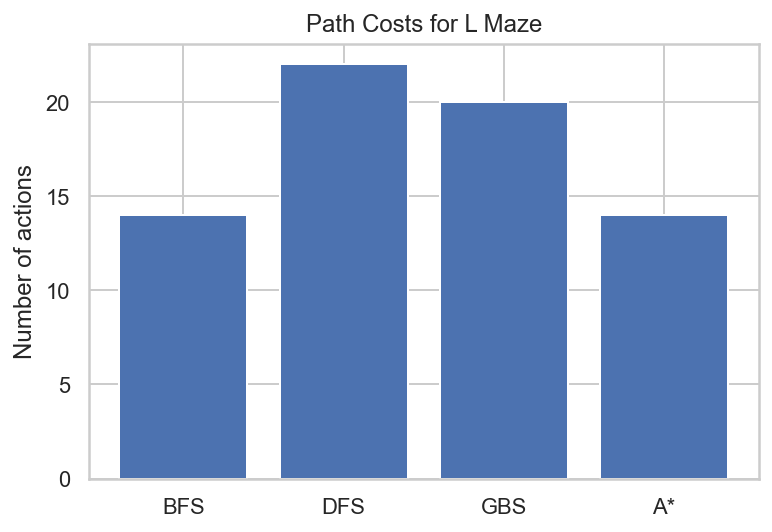

In [12]:
L_paths=dict()
#get search paths for L_maze.txt
for search in maze_results["L_maze.txt"]:
    L_paths[search]=maze_results["L_maze.txt"][search][0]
    
import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns 
sns.set(style="whitegrid")
    
#display path cost for each search algo in L_maze
plt.title("Path Costs for L Maze")
plt.bar(range(len(L_paths)), list(L_paths.values()), tick_label=list(L_paths.keys()))
plt.ylabel("Number of actions")
plt.show()

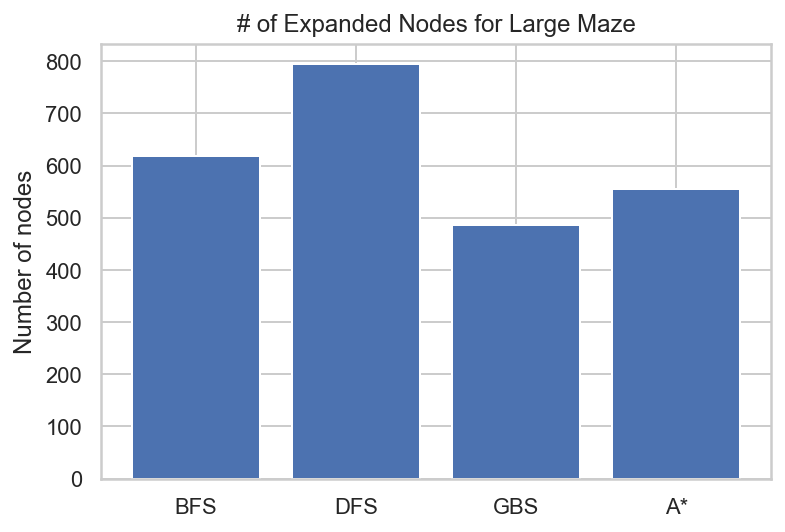

In [13]:
large_expanded=dict()
#get search expanded nodes count for large_maze.txt
for search in maze_results["large_maze.txt"]:
    large_expanded[search]=maze_results["large_maze.txt"][search][1]
    
#display expanded nodes count for each search algo in large_maze
plt.title("# of Expanded Nodes for Large Maze")
plt.bar(range(len(large_expanded)), list(large_expanded.values()), tick_label=list(large_expanded.keys()))
plt.ylabel("Number of nodes")
plt.show()

From the algorithm path depictions, we can observe how well they perform in each maze. You can see that BFS and A* have optimal paths. DFS can have optimal paths depending on the depth limit for a given maze. If given a higher depth limit, DFS will return a path that is not optimal. GFS can have optimal paths but will also have non-optimal paths due to being guided by a heuristic function.

It is worth noting that DFS could not complete the open maze. Limited DFS can't handle open spaces because it will visit previously visited nodes leading to redundant cycles and extended run time. This is due to Limited DFS only being able to track what is in its current path to prevent cycles.

In the first chart above, the different path costs for each search algorithm are depicted for the L Maze. With this graph, we can see that BFS and A* have matching and optimal paths. DFS has the highest path cost which is also the result of having a high cutoff limit. Using IDS, would allow DFS to find the optimal path. GBS did not have an optimal path because it's path went straight into the L-wall blocking the goal position. GBS resembles a path that attempted to head straight for the goal without preparing for obstacles which is a consequence of its heuristic function.

In the second chart above, the different number of expanded nodes for each search algorithm are depicted for the Large Maze. For this maze, every algorithm had the same path. We can observe that DFS expanded the most nodes, and that is due DFS visiting nodes that it has already visited while attempting a different path. This can be noticed when viewing its path and seeing that it's path has the least amount of unique positions explored. GBS has the least number explored nodes which is a result of GBS not exploring paths that weren't in the direction of the goal. BFS has the second highest amount of expanded nodes and visibly has the most unique nodes explored. This is due to BFS expanding to each node on the current tree level before moving to the next level.

Discuss the most important lessons you have learned from implementing the different search strategies. 

While implementing these search algorithms, I have learned about the differences between uninformed and informed algorithms. For each algorithm, I learned about their four important aspects which are whether they are complete and/or optimal and their respective time and space complexities. I learned about how informed searches utilize heuristic functions and that A* is an optimally efficient search algorithm.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [14]:
# Your code/answer goes here

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [15]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [16]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [17]:
# Your code/answer goes here